In [2]:
# If you run this notebook on Google Colaboratory, uncomment the below to install automl_alex.
#!pip install -U -q automl-alex

In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

import automl_alex
from automl_alex import DataPrepare

print(automl_alex.__version__)

1.2.25


In [2]:
RANDOM_SEED = 42

# Load Data

In [3]:
dataset = fetch_openml(name='adult', version=1, as_frame=True)
# convert target to binary
dataset.target = dataset.target.astype('category').cat.codes
dataset.data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
0,2,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States
1,3,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States
2,2,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States
3,3,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States
4,1,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba


In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, 
                                                    dataset.target,
                                                    test_size=0.2, 
                                                    random_state=RANDOM_SEED,)
X_train.shape, X_test.shape

((39073, 14), (9769, 14))

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39073 entries, 37193 to 15795
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             39073 non-null  category
 1   workclass       36851 non-null  category
 2   fnlwgt          39073 non-null  float64 
 3   education       39073 non-null  category
 4   education-num   39073 non-null  float64 
 5   marital-status  39073 non-null  category
 6   occupation      36842 non-null  category
 7   relationship    39073 non-null  category
 8   race            39073 non-null  category
 9   sex             39073 non-null  category
 10  capitalgain     39073 non-null  category
 11  capitalloss     39073 non-null  category
 12  hoursperweek    39073 non-null  category
 13  native-country  38396 non-null  category
dtypes: category(12), float64(2)
memory usage: 1.3 MB


As we can see, the data is quite dirty, there are object/category features and nans. But the **model is successfully trained even in such a dirty dataset**      
[RUS] Как мы видим, данные довольно грязные, есть object/category признаки и nans. Но модель успешно обучаеться даже таком грязном датасете

# Data Cleaning (DataPrepare)
before entering the AutoML, the data goes through a full cycle of pre-processing in DataPrepare Class     
[RUS] до того как попасть в AutoML, данные проходят полный цикл предобработки в классе DataPrepare. Давайте расмотрим его отдельно

In [6]:
de = DataPrepare(clean_and_encod_data=True,
                cat_encoder_names=['HelmertEncoder','OneHotEncoder'], # Encoders list for Generator cat encodet features
                clean_nan=True, # fillnan
                clean_outliers=True, # method='IQR', threshold=2,
                drop_invariant=True, # drop invariant features (data.nunique < 2)
                num_generator_features=True, # Generator interaction Num Features
                normalization=True, # normalization data (StandardScaler)
                cat_features=None, # DataPrepare can auto detect categorical features
                random_state=RANDOM_SEED)
clean_X_train = de.fit_transform(X_train)

Source data shape:  (39073, 14)
##################################################
! START preprocessing Data
- Auto detect cat features:  12
> Binary Features
> Clean Categorical Features
> Transform Categorical Features.
 - Encoder: HelmertEncoder ADD features: 123
 - Encoder: OneHotEncoder ADD features: 135
> CleanOutliers
Num of outlier detected: 253 in Feature education-num
Proportion of outlier detected: 0.6 %
Num of outlier detected: 560 in Feature fnlwgt
Proportion of outlier detected: 1.4 %
  No nans features
> Generate interaction Num Features
 ADD features: 3
> Normalization Features
> Reduce_Memory
Memory usage of dataframe is 45.57 MB
Memory usage after optimization is: 25.86 MB
Decreased by 43.3%
##################################################
Final data shape:  (39073, 277)
Total ADD columns: 263
##################################################


In [7]:
clean_X_train.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,OneHotEncoder_native-country_37,OneHotEncoder_native-country_38,OneHotEncoder_native-country_39,OneHotEncoder_native-country_40,OneHotEncoder_native-country_41,education-num_Is_Outliers_IQR,fnlwgt_Is_Outliers_IQR,education-num_/_fnlwgt,education-num_*_fnlwgt,education-num_-_fnlwgt
0,-1.213983,-0.578503,-1.393787,-0.994139,-0.427392,-0.938503,-1.571706,-0.973272,-0.343966,1,...,0,0,0,0,0,0,0,1.279582,-1.286950,1.393774
1,-0.540769,0.008976,-0.445462,-0.737964,1.540726,-0.938503,-1.293613,-0.973272,-0.343966,1,...,0,0,0,0,0,0,0,0.222263,0.118233,0.445501
2,-1.213983,0.596455,0.647424,-0.481790,-0.821015,-0.938503,-1.015520,-0.973272,-0.343966,1,...,0,0,0,0,0,0,0,-0.636650,0.115378,-0.647444
3,0.132444,-0.578503,-1.203591,-0.994139,-0.427392,-0.259678,-0.737427,-0.356984,-0.343966,1,...,0,0,0,0,0,0,0,0.649488,-1.135171,1.203579
4,0.132444,1.183934,-1.618117,-0.994139,-0.427392,0.419147,-0.459334,0.259304,-0.343966,1,...,0,0,0,0,0,0,0,3.085444,-1.465968,1.618104


<img src="./img/magic.gif" width="400">

In [8]:
clean_X_test = de.transform(X_test)

##################################################
! Start Transform Data
> Clean Binary Features
> Clean Categorical Features
> Transform Categorical Features.
 - Encoder: HelmertEncoder ADD features: 123
 - Encoder: OneHotEncoder ADD features: 135
> Generate interaction Num Features
 ADD features: 3
> Normalization Features
> Reduce_Memory
Memory usage of dataframe is 11.39 MB
Memory usage after optimization is: 6.47 MB
Decreased by 43.3%
##################################################
Final data shape:  (9769, 277)
Total ADD columns: 263
##################################################


In [9]:
clean_X_test.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,OneHotEncoder_native-country_37,OneHotEncoder_native-country_38,OneHotEncoder_native-country_39,OneHotEncoder_native-country_40,OneHotEncoder_native-country_41,education-num_Is_Outliers_IQR,fnlwgt_Is_Outliers_IQR,education-num_/_fnlwgt,education-num_*_fnlwgt,education-num_-_fnlwgt
0,1.478871,-0.578503,2.378021,-0.994139,-0.427392,1.097972,-0.181241,0.259304,-0.343966,1,...,0,0,0,0,0,0,0,-0.774084,1.723003,-2.378030
1,1.478871,-0.578503,-0.094879,-0.481790,-0.821015,1.097972,-0.459334,1.491880,-0.343966,0,...,0,0,0,0,0,0,0,-0.465758,-0.411171,0.094857
2,1.478871,0.596455,1.627877,-0.994139,-0.427392,1.097972,0.931131,0.875592,1.069113,1,...,0,0,0,0,0,0,0,-0.714685,1.124377,-1.627886
3,1.478871,-0.578503,0.302919,0.286733,-0.033768,1.097972,-0.459334,1.491880,-0.343966,0,...,0,0,0,0,0,0,0,-0.450994,0.263083,-0.302920
4,0.805658,-0.578503,0.564424,-0.994139,-0.427392,1.097972,1.209224,-0.356984,5.308352,1,...,0,0,0,0,0,0,0,-0.568708,0.275728,-0.564434


## Save and Load
separate transform allows us to save and transfer processing to new data 
[RUS] раздельный transform позволяет нам сохранять и переносить обработку на новые данные

In [10]:
de.save('de', folder='./save/')

Save DataPrepare


In [11]:
de_new = DataPrepare()
de_new = de.load('de', folder='./save/')

Load DataPrepare


In [12]:
de_new.transform(X_test).head(5)

##################################################
! Start Transform Data
> Clean Binary Features
> Clean Categorical Features
> Transform Categorical Features.
 - Encoder: HelmertEncoder ADD features: 123
 - Encoder: OneHotEncoder ADD features: 135
> Generate interaction Num Features
 ADD features: 3
> Normalization Features
> Reduce_Memory
Memory usage of dataframe is 11.39 MB
Memory usage after optimization is: 6.47 MB
Decreased by 43.3%
##################################################
Final data shape:  (9769, 277)
Total ADD columns: 263
##################################################


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,OneHotEncoder_native-country_37,OneHotEncoder_native-country_38,OneHotEncoder_native-country_39,OneHotEncoder_native-country_40,OneHotEncoder_native-country_41,education-num_Is_Outliers_IQR,fnlwgt_Is_Outliers_IQR,education-num_/_fnlwgt,education-num_*_fnlwgt,education-num_-_fnlwgt
0,1.478871,-0.578503,2.378021,-0.994139,-0.427392,1.097972,-0.181241,0.259304,-0.343966,1,...,0,0,0,0,0,0,0,-0.774084,1.723003,-2.378030
1,1.478871,-0.578503,-0.094879,-0.481790,-0.821015,1.097972,-0.459334,1.491880,-0.343966,0,...,0,0,0,0,0,0,0,-0.465758,-0.411171,0.094857
2,1.478871,0.596455,1.627877,-0.994139,-0.427392,1.097972,0.931131,0.875592,1.069113,1,...,0,0,0,0,0,0,0,-0.714685,1.124377,-1.627886
3,1.478871,-0.578503,0.302919,0.286733,-0.033768,1.097972,-0.459334,1.491880,-0.343966,0,...,0,0,0,0,0,0,0,-0.450994,0.263083,-0.302920
4,0.805658,-0.578503,0.564424,-0.994139,-0.427392,1.097972,1.209224,-0.356984,5.308352,1,...,0,0,0,0,0,0,0,-0.568708,0.275728,-0.564434


# Feature Engineering

## Categorical Features 
### Encoders

In [13]:
# available Encoders:
automl_alex.encoders.cat_encoders_names

{'HashingEncoder': category_encoders.hashing.HashingEncoder,
 'SumEncoder': category_encoders.sum_coding.SumEncoder,
 'BackwardDifferenceEncoder': category_encoders.backward_difference.BackwardDifferenceEncoder,
 'OneHotEncoder': category_encoders.one_hot.OneHotEncoder,
 'HelmertEncoder': category_encoders.helmert.HelmertEncoder,
 'BaseNEncoder': category_encoders.basen.BaseNEncoder,
 'CountEncoder': category_encoders.count.CountEncoder}

you can use any encoders for categorical features, combining their results (if you have enough memory)

In [14]:
X_train[['workclass','marital-status']].head(5)

,workclass,marital-status
37193,Private,Married-civ-spouse
31093,State-gov,Married-civ-spouse
33814,Local-gov,Married-civ-spouse
14500,Private,Divorced
23399,Self-emp-not-inc,Widowed


In [15]:
de = DataPrepare(
    cat_encoder_names=['OneHotEncoder',], # Encoders list for Generator cat encodet features
    )  
clean_X_train = de.fit_transform(X_train[['workclass','marital-status']])

Source data shape:  (39073, 2)
##################################################
! START preprocessing Data
- Auto detect cat features:  2
> Clean Categorical Features
> Transform Categorical Features.
 - Encoder: OneHotEncoder ADD features: 16
> CleanOutliers
  No nans features
> Normalization Features
> Reduce_Memory
Memory usage of dataframe is 1.19 MB
Memory usage after optimization is: 0.89 MB
Decreased by 25.0%
##################################################
Final data shape:  (39073, 18)
Total ADD columns: 16
##################################################


In [16]:
clean_X_train.head(5)

,workclass,marital-status,OneHotEncoder_workclass_1,OneHotEncoder_workclass_2,OneHotEncoder_workclass_3,OneHotEncoder_workclass_4,OneHotEncoder_workclass_5,OneHotEncoder_workclass_6,OneHotEncoder_workclass_7,OneHotEncoder_workclass_8,OneHotEncoder_workclass_9,OneHotEncoder_marital-status_1,OneHotEncoder_marital-status_2,OneHotEncoder_marital-status_3,OneHotEncoder_marital-status_4,OneHotEncoder_marital-status_5,OneHotEncoder_marital-status_6,OneHotEncoder_marital-status_7
0,-0.578503,-0.938503,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.008976,-0.938503,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0.596455,-0.938503,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.578503,-0.259678,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1.183934,0.419147,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


**Encoder selection is important part of all AutoML**    

## Numerical Features

### Clean NANs

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39073 entries, 37193 to 15795
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             39073 non-null  category
 1   workclass       36851 non-null  category
 2   fnlwgt          39073 non-null  float64 
 3   education       39073 non-null  category
 4   education-num   39073 non-null  float64 
 5   marital-status  39073 non-null  category
 6   occupation      36842 non-null  category
 7   relationship    39073 non-null  category
 8   race            39073 non-null  category
 9   sex             39073 non-null  category
 10  capitalgain     39073 non-null  category
 11  capitalloss     39073 non-null  category
 12  hoursperweek    39073 non-null  category
 13  native-country  38396 non-null  category
dtypes: category(12), float64(2)
memory usage: 1.3 MB


In [18]:
X_train.isnull().any().any()

True

In [19]:
de = DataPrepare(
    clean_nan=True,
    verbose=0,
    )
clean_X_train = de.fit_transform(X_train)

In [20]:
clean_X_train.isnull().any().any()

False

## Clean Outliers
remove outliers from your data.    
Available two methods solution based on "z score" and solution based on "IQR". default "IQR" 

<img src="./img/boxplot.png" width="600">

In [21]:
# add dataset whis more num features
dataset = fetch_openml(name='credit-g', version=1, as_frame=True)
dataset.target = dataset.target.astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=RANDOM_SEED,)
X_train.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
29,<0,60.0,delayed previously,business,6836.0,<100,>=7,3.0,male single,none,4.0,no known property,63.0,none,own,2.0,skilled,1.0,yes,yes
535,>=200,21.0,critical/other existing credit,education,2319.0,<100,<1,2.0,male div/sep,none,1.0,car,33.0,none,rent,1.0,skilled,1.0,none,yes
695,no checking,6.0,existing paid,used car,1236.0,500<=X<1000,1<=X<4,2.0,male single,none,4.0,life insurance,50.0,none,rent,1.0,skilled,1.0,none,yes


<AxesSubplot:>

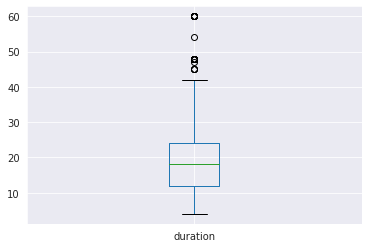

In [22]:
X_train.boxplot(column=['duration',])

In [23]:
de = DataPrepare(
    clean_outliers=True,
    outliers_method='IQR', # method : ['IQR', 'z_score',]
    outliers_threshold=1.5,
    )
clean_X_train = de.fit_transform(X_train)

Source data shape:  (800, 20)
##################################################
! START preprocessing Data
- Auto detect cat features:  13
> Binary Features
> Clean Categorical Features
> Transform Categorical Features.
 - Encoder: HelmertEncoder ADD features: 39
 - Encoder: CountEncoder ADD features: 13
> CleanOutliers
Num of outlier detected: 18 in Feature age
Proportion of outlier detected: 2.2 %
Num of outlier detected: 54 in Feature duration
Proportion of outlier detected: 6.8 %
Num of outlier detected: 5 in Feature existing_credits
Proportion of outlier detected: 0.6 %
Num of outlier detected: 58 in Feature credit_amount
Proportion of outlier detected: 7.3 %
  No nans features
> Generate interaction Num Features
 ADD features: 45
> Normalization Features
> Reduce_Memory
Memory usage of dataframe is 0.71 MB
Memory usage after optimization is: 0.36 MB
Decreased by 49.8%
##################################################
Final data shape:  (800, 123)
Total ADD columns: 103
########

<AxesSubplot:>

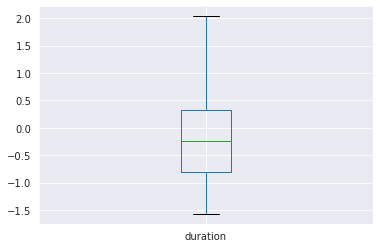

In [24]:
clean_X_train.boxplot(column=['duration',])

try different values threshold and method

### Generator interaction Num Features
Numerical interaction generator features: A/B, A*B, A-B, A+B

In [25]:
de = DataPrepare(
                num_generator_features=True, # Generator interaction Num Features
                operations_num_generator=['/','*','-',],
                )
clean_X_train = de.fit_transform(X_train)

Source data shape:  (800, 20)
##################################################
! START preprocessing Data
- Auto detect cat features:  13
> Binary Features
> Clean Categorical Features
> Transform Categorical Features.
 - Encoder: HelmertEncoder ADD features: 39
 - Encoder: CountEncoder ADD features: 13
> CleanOutliers
Num of outlier detected: 6 in Feature age
Proportion of outlier detected: 0.8 %
Num of outlier detected: 10 in Feature duration
Proportion of outlier detected: 1.2 %
Num of outlier detected: 38 in Feature credit_amount
Proportion of outlier detected: 4.8 %
  No nans features
> Generate interaction Num Features
 ADD features: 45
> Normalization Features
> Reduce_Memory
Memory usage of dataframe is 0.71 MB
Memory usage after optimization is: 0.36 MB
Decreased by 49.8%
##################################################
Final data shape:  (800, 123)
Total ADD columns: 103
##################################################


In [26]:
clean_X_train.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,duration_-_credit_amount,installment_commitment_/_existing_credits,installment_commitment_*_existing_credits,installment_commitment_-_existing_credits,installment_commitment_/_credit_amount,installment_commitment_*_credit_amount,installment_commitment_-_credit_amount,existing_credits_/_credit_amount,existing_credits_*_credit_amount,existing_credits_-_credit_amount
0,-1.471070,2.373293,-1.886020,-1.925181,1.447777,-0.741439,-1.341000,0.031196,-0.856163,-0.316463,...,-1.441103,-0.740823,0.742693,-0.440943,-0.762252,1.656095,-1.447564,-0.624829,2.068558,-1.447551
1,-0.590848,0.004168,-0.752424,-1.354334,-0.366738,-0.741439,-0.522069,-0.860109,0.047439,-0.316463,...,0.367827,-0.325699,-0.900888,-0.440943,-0.510960,-0.575610,0.366300,-0.439404,-0.522170,0.366575
2,0.289373,-1.312013,0.381172,-0.783487,-0.801787,0.043153,0.296863,-0.860109,-0.856163,-0.316463,...,0.798102,-0.325699,-0.900888,-0.440943,-0.062655,-0.880202,0.801290,0.065899,-0.769309,0.801628
3,0.289373,0.004168,1.514768,-0.212640,0.711446,0.827744,0.296863,-1.751413,0.951042,-0.316463,...,-0.713503,-1.571070,-0.900888,-2.033514,-0.904022,-0.524283,-0.712138,-0.481477,1.231985,-0.711215
4,0.289373,-0.785541,0.381172,0.358206,-0.942385,0.827744,0.296863,0.922500,0.951042,-0.316463,...,0.941528,1.334795,-0.079097,1.151628,1.655713,-0.729453,0.942671,0.493322,-0.849178,0.942227


### Normalization

In [27]:
de = DataPrepare(
    normalization=True, # normalization data - StandardScaler
    verbose=0,
    )
clean_X_train = de.fit_transform(X_train)
clean_X_train.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,duration_-_credit_amount,installment_commitment_/_existing_credits,installment_commitment_*_existing_credits,installment_commitment_-_existing_credits,installment_commitment_/_credit_amount,installment_commitment_*_credit_amount,installment_commitment_-_credit_amount,existing_credits_/_credit_amount,existing_credits_*_credit_amount,existing_credits_-_credit_amount
0,-1.471070,2.373293,-1.886020,-1.925181,1.447777,-0.741439,-1.341000,0.031196,-0.856163,-0.316463,...,-1.441103,-0.740823,0.742693,-0.440943,-0.762252,1.656095,-1.447564,-0.624829,2.068558,-1.447551
1,-0.590848,0.004168,-0.752424,-1.354334,-0.366738,-0.741439,-0.522069,-0.860109,0.047439,-0.316463,...,0.367827,-0.325699,-0.900888,-0.440943,-0.510960,-0.575610,0.366300,-0.439404,-0.522170,0.366575
2,0.289373,-1.312013,0.381172,-0.783487,-0.801787,0.043153,0.296863,-0.860109,-0.856163,-0.316463,...,0.798102,-0.325699,-0.900888,-0.440943,-0.062655,-0.880202,0.801290,0.065899,-0.769309,0.801628
3,0.289373,0.004168,1.514768,-0.212640,0.711446,0.827744,0.296863,-1.751413,0.951042,-0.316463,...,-0.713503,-1.571070,-0.900888,-2.033514,-0.904022,-0.524283,-0.712138,-0.481477,1.231985,-0.711215
4,0.289373,-0.785541,0.381172,0.358206,-0.942385,0.827744,0.296863,0.922500,0.951042,-0.316463,...,0.941528,1.334795,-0.079097,1.151628,1.655713,-0.729453,0.942671,0.493322,-0.849178,0.942227


Even with such smart preprocessing, don't forget the basic DS rule: **Garbage in the input is garbage in the output.**

[RUS] Даже с такой умной предобработкой не забывайте: Мусор на входе - мусор на выходе.

<img src="./img/data-cleaning.png" width="700">